In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [23]:
path = '../data/'
df = pd.read_pickle(path+'df.pickle')
df.head()

,id,name,arrival_airport,departure_airport,interest,interest_vector
0,1,Charlotte,LAX,SEA,Language learner who enjoys exploring differen...,"[0.07446141541004181, -0.045766644179821014, 0..."
1,2,Mia,MIA,ATL,Adventure seeker always on the lookout for adr...,"[0.08527673035860062, 0.06595397740602493, 0.0..."
2,3,Olivia,DEN,LAS,DIY enthusiast who loves crafting and creating...,"[-0.08646365255117416, 0.006359368562698364, 0..."
3,4,Emily,SFO,LAS,History buff fascinated by ancient civilizatio...,"[0.018924666568636894, 0.051473431289196014, -..."
4,5,Alexander,JFK,DFW,Environmental activist committed to protecting...,"[0.0715714693069458, 0.10405290871858597, 0.02..."


In [24]:
df.head()
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 30 non-null     int64 
 1   name               30 non-null     object
 2   arrival_airport    30 non-null     object
 3   departure_airport  30 non-null     object
 4   interest           30 non-null     object
 5   interest_vector    30 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.5+ KB


Index(['id', 'name', 'arrival_airport', 'departure_airport', 'interest',
       'interest_vector'],
      dtype='object')

In [25]:
import ast

def generate_adjacency_matrix(df):
    # Extract vectors from the 'vec' column
    vectors = df['interest_vector'].values
    
    # Get the number of vectors
    num_vectors = len(vectors)
    
    # Initialize an empty adjacency matrix
    adjacency_matrix = np.zeros((num_vectors, num_vectors))
    
    # Calculate dot product for each pair of vectors and store in the adjacency matrix
    for i in range(num_vectors):
        for j in range(i, num_vectors): # To avoid redundant calculations
            dot_product = np.dot(vectors[i], vectors[j])
            adjacency_matrix[i, j] = dot_product
            adjacency_matrix[j, i] = dot_product  # Since dot product is symmetric
    
    return adjacency_matrix

# Convert string representation of list to actual list and then to numpy array
#df['interest_vector'] = df['interest_vector'].apply(lambda x: np.array(ast.literal_eval(x), dtype=float))

adjacency_matrix = generate_adjacency_matrix(df)

In [26]:
#df['interest_vector'] = df['interest_vector'].apply(lambda x: np.array(x, dtype=float))

adjacency_matrix =  generate_adjacency_matrix(df)

In [27]:
def top_6_indices(adjacency_matrix):
    # Get the number of rows (assuming the adjacency matrix is square)
    num_rows = adjacency_matrix.shape[0]
    
    # Initialize an empty array to store the top 6 indices for each row
    top_indices = np.zeros((num_rows, 6), dtype=int)
    
    # Iterate over each row of the adjacency matrix
    for i in range(num_rows):
        # Sort the row indices based on their corresponding values
        sorted_indices = np.argsort(adjacency_matrix[i])[::-1]  # Reverse order to get descending values
        
        # Select the top 6 indices (excluding the first one, as it will be the row itself)
        top_indices[i] = sorted_indices[1:7]  # Exclude the first index (self)
    
    return top_indices

In [28]:
top_6_indices = top_6_indices(adjacency_matrix)
top_6_indices

array([[20,  9, 29, 11, 25,  5],
       [21, 29,  9, 26,  6, 12],
       [22, 14, 27,  7, 10, 11],
       [23, 29,  9, 19, 16, 27],
       [ 4, 26,  6, 12, 18,  8],
       [ 5, 12, 14, 27,  7, 26],
       [ 6, 27,  7,  8, 28, 21],
       [ 7, 26,  6, 11, 14,  2],
       [ 8,  6, 26,  5, 25, 12],
       [ 9, 20,  0, 11,  1, 21],
       [13,  2, 22, 12, 14, 27],
       [27,  7, 29,  9, 20,  0],
       [ 5, 25, 14, 10, 26,  6],
       [10,  2, 22, 29,  9, 11],
       [ 2, 22, 27,  7, 12, 25],
       [ 6, 26, 29,  9,  8, 28],
       [14, 12,  2, 22, 25,  5],
       [11, 14, 19, 18, 27,  7],
       [26,  6,  7, 27, 12, 10],
       [11, 27,  7, 14,  3, 23],
       [20,  9, 29, 11, 25,  5],
       [21, 29,  9, 26,  6, 12],
       [22, 14, 27,  7, 10, 11],
       [23, 29,  9, 19, 16, 27],
       [ 4, 26,  6, 12, 18,  8],
       [ 5, 12, 14, 27,  7, 26],
       [ 6, 27,  7,  8, 28, 21],
       [ 7, 26,  6, 11, 14,  2],
       [ 8,  6, 26,  5, 25, 12],
       [ 9, 20,  0, 11,  1, 21]])

In [29]:
def top_6_user_names(adjacency_matrix, user_names):
    # Get the number of rows (assuming the adjacency matrix is square)
    num_rows = adjacency_matrix.shape[0]
    
    # Initialize an empty list to store the top 6 user names for each row
    top_user_names = []
    
    # Iterate over each row of the adjacency matrix
    for i in range(num_rows):
        # Sort the row indices based on their corresponding values
        sorted_indices = np.argsort(adjacency_matrix[i])[::-1]  # Reverse order to get descending values
        
        # Select the top 6 indices (excluding the first one, as it will be the row itself)
        top_indices = sorted_indices[1:7]  # Exclude the first index (self)
        
        # Get the corresponding user names for the top indices
        top_names = [user_names[index] for index in top_indices]
        
        # Append the list of top user names for this row
        top_user_names.append((user_names[i], top_names))
    
    return top_user_names

In [30]:
top_6_user_names = top_6_user_names(adjacency_matrix, df.name)
top_6_user_names

[('Charlotte', ['John', 'Joseph', 'Andrew', 'Ethan', 'Sophia', 'Grace']),
 ('Mia', ['Benjamin', 'Andrew', 'Joseph', 'Abigail', 'Sofia', 'Ava']),
 ('Olivia', ['Michael', 'William', 'Ella', 'Elizabeth', 'Samuel', 'Ethan']),
 ('Emily', ['James', 'Andrew', 'Joseph', 'Amelia', 'Evelyn', 'Ella']),
 ('Alexander', ['Alexander', 'Abigail', 'Sofia', 'Ava', 'Daniel', 'Harper']),
 ('Grace', ['Grace', 'Ava', 'William', 'Ella', 'Elizabeth', 'Abigail']),
 ('Sofia', ['Sofia', 'Ella', 'Elizabeth', 'Harper', 'Matthew', 'Benjamin']),
 ('Elizabeth',
  ['Elizabeth', 'Abigail', 'Sofia', 'Ethan', 'William', 'Olivia']),
 ('Harper', ['Harper', 'Sofia', 'Abigail', 'Grace', 'Sophia', 'Ava']),
 ('Joseph', ['Joseph', 'John', 'Charlotte', 'Ethan', 'Mia', 'Benjamin']),
 ('Samuel', ['Henry', 'Olivia', 'Michael', 'Ava', 'William', 'Ella']),
 ('Ethan', ['Ella', 'Elizabeth', 'Andrew', 'Joseph', 'John', 'Charlotte']),
 ('Ava', ['Grace', 'Sophia', 'William', 'Samuel', 'Abigail', 'Sofia']),
 ('Henry', ['Samuel', 'Olivia', 

In [31]:
df.columns

Index(['id', 'name', 'arrival_airport', 'departure_airport', 'interest',
       'interest_vector'],
      dtype='object')

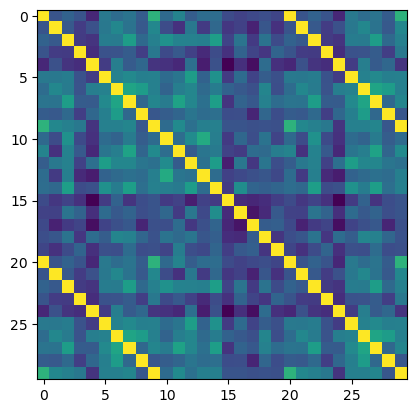

In [32]:
plt.imshow(adjacency_matrix)

In [33]:
df

,id,name,arrival_airport,departure_airport,interest,interest_vector
0,1,Charlotte,LAX,SEA,Language learner who enjoys exploring differen...,"[0.07446141541004181, -0.045766644179821014, 0..."
1,2,Mia,MIA,ATL,Adventure seeker always on the lookout for adr...,"[0.08527673035860062, 0.06595397740602493, 0.0..."
2,3,Olivia,DEN,LAS,DIY enthusiast who loves crafting and creating...,"[-0.08646365255117416, 0.006359368562698364, 0..."
3,4,Emily,SFO,LAS,History buff fascinated by ancient civilizatio...,"[0.018924666568636894, 0.051473431289196014, -..."
4,5,Alexander,JFK,DFW,Environmental activist committed to protecting...,"[0.0715714693069458, 0.10405290871858597, 0.02..."
5,6,Grace,ORD,ATL,Sports enthusiast who enjoys both playing and ...,"[0.024302437901496887, -0.017412899062037468, ..."
6,7,Sofia,LAX,MIA,Nature lover who finds solace in exploring nat...,"[0.020037289708852768, -0.0491764210164547, 0...."
7,8,Elizabeth,ATL,DFW,Photography enthusiast who loves capturing sce...,"[0.04038294404745102, 0.006609178148210049, 0...."
8,9,Harper,SEA,DEN,Animal lover who enjoys spending time with pet...,"[-0.02102244459092617, -0.012827550992369652, ..."
9,10,Joseph,LAX,MIA,Travel enthusiast constantly seeking new adven...,"[0.06772451847791672, -0.019080379977822304, 0..."


In [34]:
df.to_csv(path+'Adjacency_Matrix.csv')